In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
url = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2017.csv"

In [3]:
data = pd.read_csv(url)

C:\Users\kjyou\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (42,167,168,169,170,175,176,179,180,183,184,189,190,191,192,199,200,204,205,206,227,228,232,233,234,239,241,242,250) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.options.mode.chained_assignment = None

In [5]:
data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

In [6]:
data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

In [7]:
data = data.loc[data.desc.str.contains('kneels|spiked') == False]

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data.insert(69, 'home_off_success', 0)

In [10]:
data.loc[data['epa'] > 0, 'home_off_success'] = 1

In [11]:
data.insert(70, 'home_off_epa', 0)

In [12]:
data['home_off_epa'] = data['epa']

In [13]:
data.insert(71, 'away_off_success', 0)

In [14]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(['posteam'])[['home_off_epa', 'home_off_success']].mean()

,home_off_epa,home_off_success
posteam,,
ARI,-0.105590,0.386064
ATL,0.083377,0.445344
BAL,-0.088033,0.404896
BUF,0.011440,0.393443
CAR,0.022994,0.428295
CHI,-0.063917,0.367059
CIN,-0.082432,0.392781
CLE,-0.209214,0.358921
DAL,0.025926,0.439453


In [15]:
data.loc[data['epa'] > 0, 'away_off_success'] = 1

In [16]:
data.insert(72, 'away_off_epa', 0)

In [17]:
data['away_off_epa'] = data['epa']

In [18]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(['posteam'])[['away_off_epa', 'away_off_success']].mean()

,away_off_epa,away_off_success
posteam,,
ARI,-0.175460,0.346535
ATL,0.043056,0.448203
BAL,-0.046744,0.401198
BUF,-0.118030,0.386454
CAR,-0.087528,0.371134
CHI,-0.123512,0.379798
CIN,-0.119073,0.371765
CLE,-0.124439,0.370370
DAL,0.009072,0.425887


In [19]:
data.insert(73, 'home_def_success', 0)

In [20]:
data.loc[data['epa'] > 0, 'home_def_success'] = 1

In [21]:
data.insert(74, 'home_def_epa', 0)

In [22]:
data['home_def_epa'] = data['epa']

In [23]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(['defteam'])[['home_def_epa', 'home_def_success']].mean()

,home_def_epa,home_def_success
defteam,,
ARI,-0.140064,0.365904
ATL,-0.030903,0.438669
BAL,-0.132336,0.368914
BUF,0.025021,0.413793
CAR,0.006504,0.417910
CHI,-0.052813,0.418182
CIN,0.007418,0.409709
CLE,-0.046209,0.388145
DAL,0.122097,0.452954


In [24]:
data.insert(75, 'away_def_success', 0)

In [25]:
data.loc[data['epa'] > 0, 'away_def_success'] = 1

In [26]:
data.insert(76, 'away_def_epa', 0)

In [27]:
data['away_def_epa'] = data['epa']

In [28]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(['defteam'])[['away_def_epa', 'away_def_success']].mean()

,away_def_epa,away_def_success
defteam,,
ARI,-0.016685,0.377176
ATL,0.040330,0.427105
BAL,-0.111764,0.406061
BUF,0.032413,0.429688
CAR,-0.070380,0.427039
CHI,-0.034056,0.394628
CIN,-0.074893,0.390764
CLE,0.037394,0.421053
DAL,-0.080412,0.406551


In [29]:
data.insert(77, 'success', 0)

In [30]:
data.loc[data['epa'] > 0, 'success'] = 1

In [31]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=1)

In [32]:
logos = os.listdir(os.getcwd() + '\\logos\\')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '\\logos\\' + str(i))

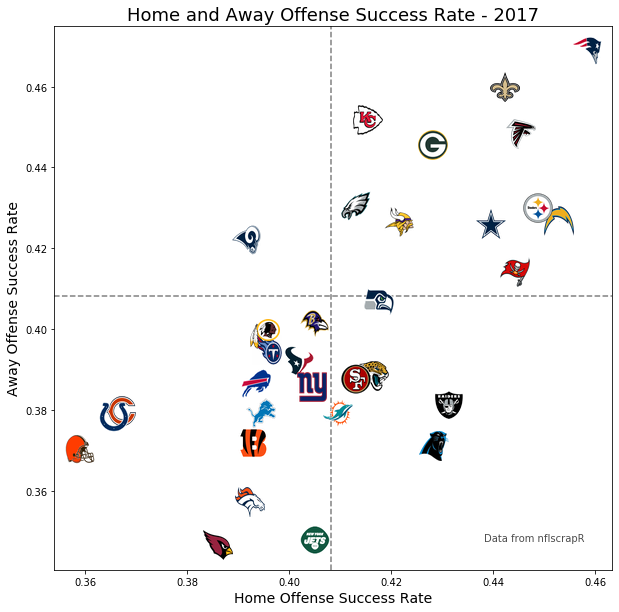

In [33]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['home_off_success']].mean().home_off_success.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['away_off_success']].mean().away_off_success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense Success Rate', fontsize=14)
ax.set_ylabel('Away Offense Success Rate', fontsize=14)
ax.set_title('Home and Away Offense Success Rate - 2017', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2017-offense-home-away-success.png', dpi=400)

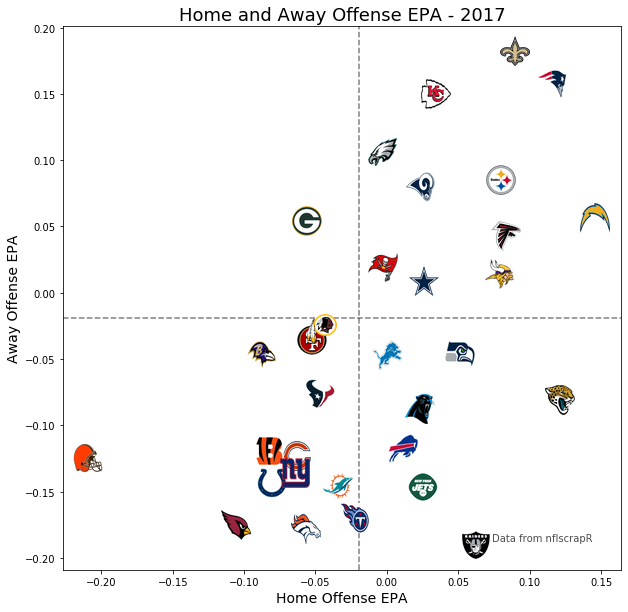

In [34]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['epa']].mean().epa.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['epa']].mean().epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_off_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_off_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense EPA', fontsize=14)
ax.set_ylabel('Away Offense EPA', fontsize=14)
ax.set_title('Home and Away Offense EPA - 2017', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2017-offense-home-away-epa.png', dpi=400)

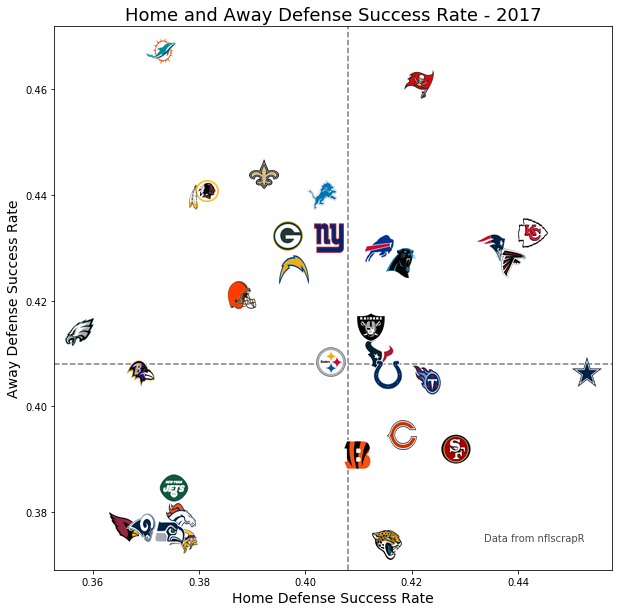

In [35]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['success']].mean().success.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['success']].mean().success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_success.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_success.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense Success Rate', fontsize=14)
ax.set_ylabel('Away Defense Success Rate', fontsize=14)
ax.set_title('Home and Away Defense Success Rate - 2017', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2017-defense-home-away-success.png', dpi=400)

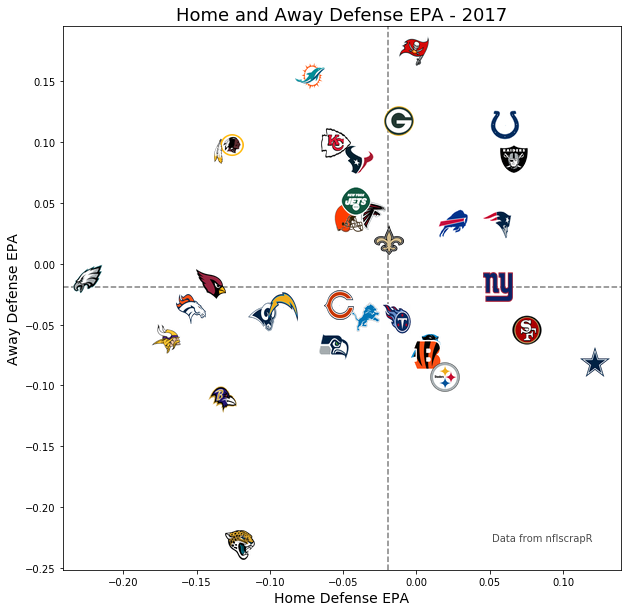

In [36]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['home_def_epa']].mean().home_def_epa.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['away_def_epa']].mean().away_def_epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Add Lines For Mean Results
ax.axvline(x=data.home_def_epa.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=data.away_def_epa.mean(), linestyle='--', alpha=.5, color='black')

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense EPA', fontsize=14)
ax.set_ylabel('Away Defense EPA', fontsize=14)
ax.set_title('Home and Away Defense EPA - 2017', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('img/2017-defense-home-away-epa.png', dpi=400)